In [2]:
library(tseries)
library(TSA)

Warning message:
"package 'TSA' was built under R version 3.6.3"
Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



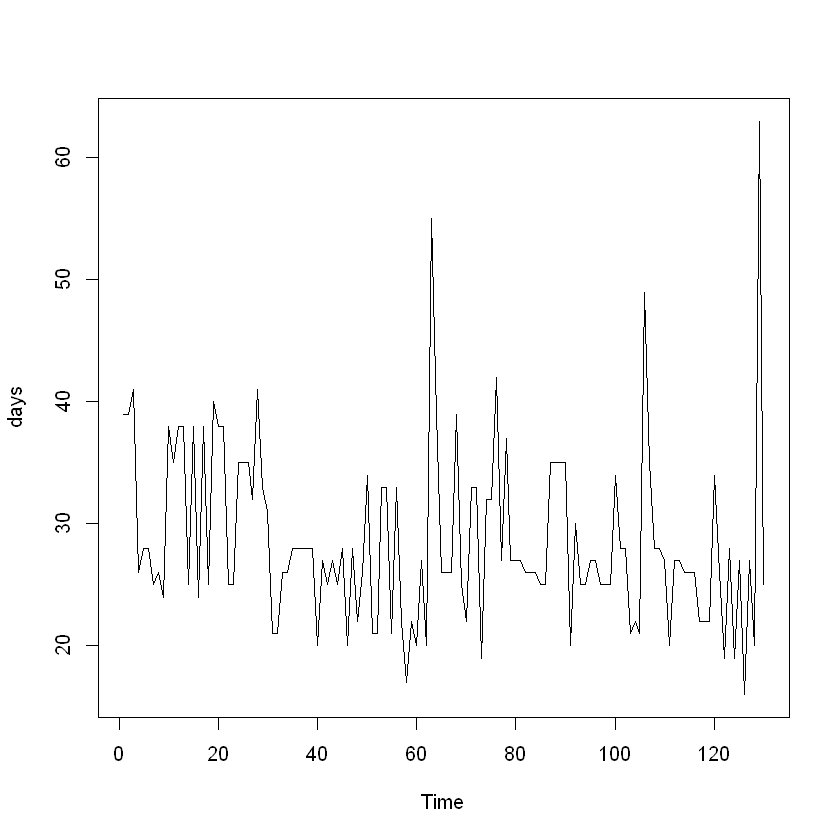

In [3]:
data(days)
plot(days)

## Clasificación

In [4]:
r<-lm(days~time(days))
summary(r)


Call:
lm(formula = days ~ time(days))

Residuals:
    Min      1Q  Median      3Q     Max 
-11.921  -4.778  -1.524   4.233  36.753 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.10555    1.26902  24.512   <2e-16 ***
time(days)  -0.03767    0.01681  -2.241   0.0268 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.193 on 128 degrees of freedom
Multiple R-squared:  0.03774,	Adjusted R-squared:  0.03022 
F-statistic:  5.02 on 1 and 128 DF,  p-value: 0.02678


**Modelo cuadrático**

In [5]:
tt<-as.numeric(time(days))
tenc<-lm(days~poly(tt, degree=2))
summary(tenc)


Call:
lm(formula = days ~ poly(tt, degree = 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-11.836  -5.537  -1.265   4.705  35.033 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            28.6385     0.6291  45.524   <2e-16 ***
poly(tt, degree = 2)1 -16.1159     7.1726  -2.247   0.0264 *  
poly(tt, degree = 2)2   9.4143     7.1726   1.313   0.1917    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.173 on 127 degrees of freedom
Multiple R-squared:  0.05062,	Adjusted R-squared:  0.03567 
F-statistic: 3.386 on 2 and 127 DF,  p-value: 0.03694


In [ ]:
abline(lm(days~time(days)), col="red")
lines(tt, fitted.values(tenc), col="blue")

**Varianza**

In [6]:
adf.test(days, alternative="stationary")

Warning message in adf.test(days, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  days
Dickey-Fuller = -4.8997, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


<font color= "red"> Nota:</font> si es estacionaria
<u>Por lo tanto, si es estacionaria </u>

## Modelado

**AR**

In [9]:
ar(days)


Call:
ar(x = days)


Order selected 0  sigma^2 estimated as  53.35

**MA**

In [7]:
aic0<-Inf # le das un numero muy grande
for (i in 1:10)
{
  aic1<-AIC(arima(days, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
aic0 
MA.mejor

[1] 888.9546

[1] 2

**ARMA**

In [10]:
arma.aic<-Inf
for(j in 1:10)
{
  for (i in 1:10)
  {
    aux<-AIC(arima(days, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
arma.aic
ARMA.mejor 

Warning message in log(s2):
"Se han producido NaNs"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible con

[1] 888.2239

[1] 1 2

## Ruido blanco

In [13]:
res<-residuals(arima(days, order=c(1,0,2)))
print(res)

Time Series:
Start = 1 
End = 130 
Frequency = 1 
  [1]   9.96344933   9.11175072   9.63696427  -4.14308236  -1.58782816
  [6]   1.21962079  -4.73886505  -1.68024543  -3.95334929   9.71853470
 [11]   5.92587817   6.40877812   9.09871143  -6.23377631   9.51792467
 [16]  -4.32217672   7.13754431  -1.86043130   8.43294544  10.84867328
 [21]   4.80843681  -3.85531379  -4.32968711   8.29081956   5.08514321
 [26]   4.46659214   2.79988235  11.21770144   3.06579097  -0.03591650
 [31]  -6.79690957  -7.48031406  -0.17821694  -2.48033606  -0.47100192
 [36]  -0.12115923  -0.92578672  -0.35537052  -0.61640900  -8.54902024
 [41]  -0.59575734  -2.15915106  -2.33034997  -2.38077387  -0.70172826
 [46]  -7.95739839  -0.05944042  -5.04854473  -3.20624881   7.37910320
 [51]  -9.15896708  -7.45085724   7.40588233   3.20891010  -9.17177670
 [56]   5.63357133  -5.89304980 -12.97907720  -2.70998586  -7.79886006
 [61]  -0.67241345  -7.28940726  26.38466527   9.05867480  -9.64190922
 [66]   1.02914340  -2.9147

**Media**

In [14]:
mean(res)

[1] -0.01040132

**Varianza**

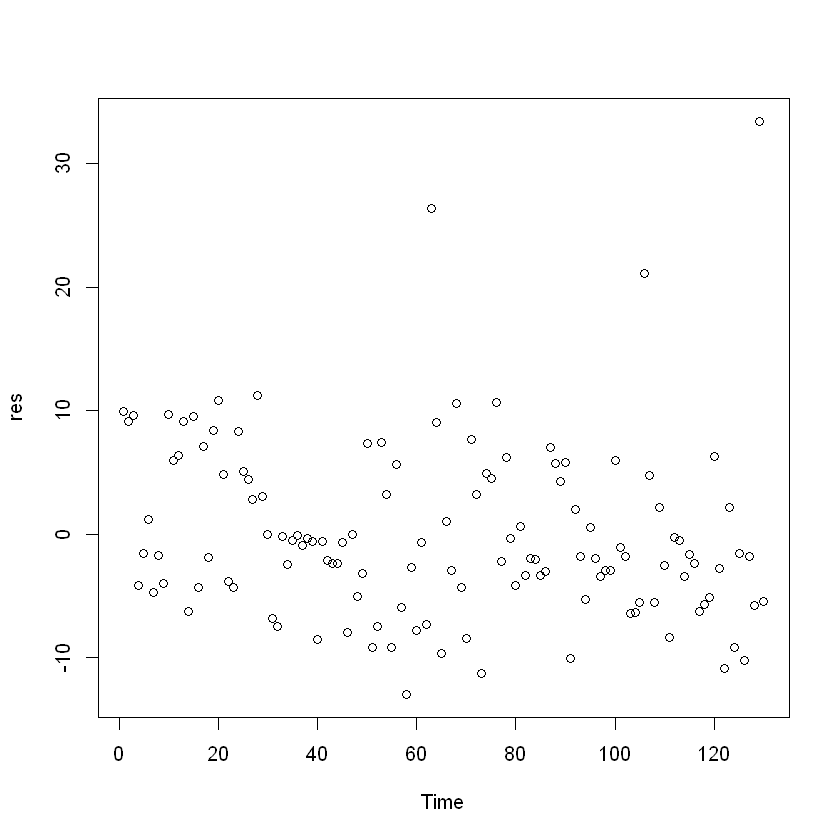

In [15]:
plot(res, type="p")

**Incorrelación**

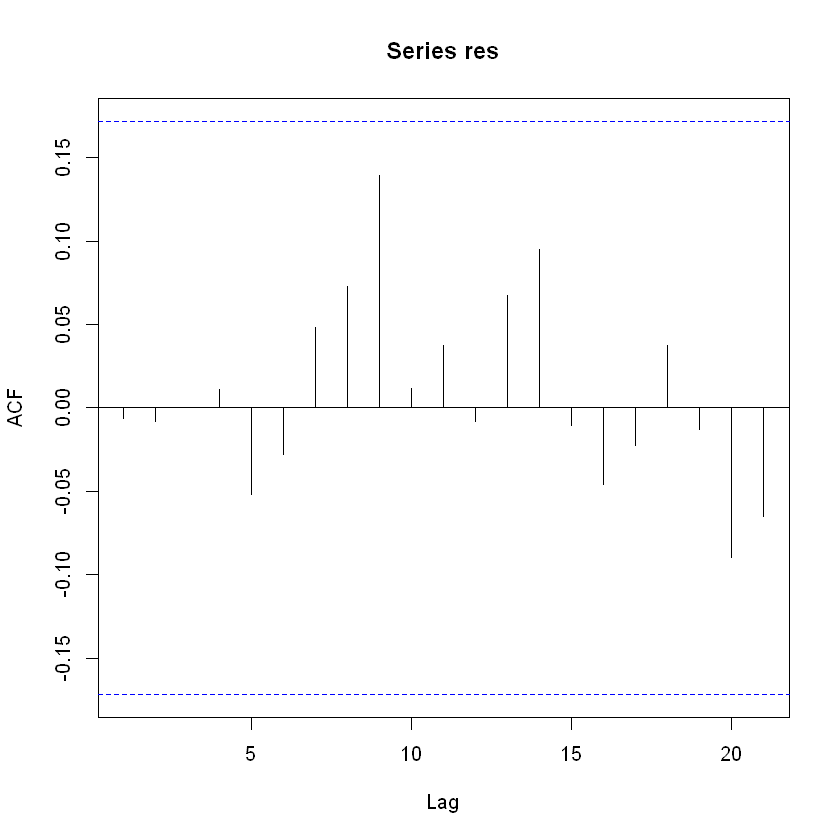

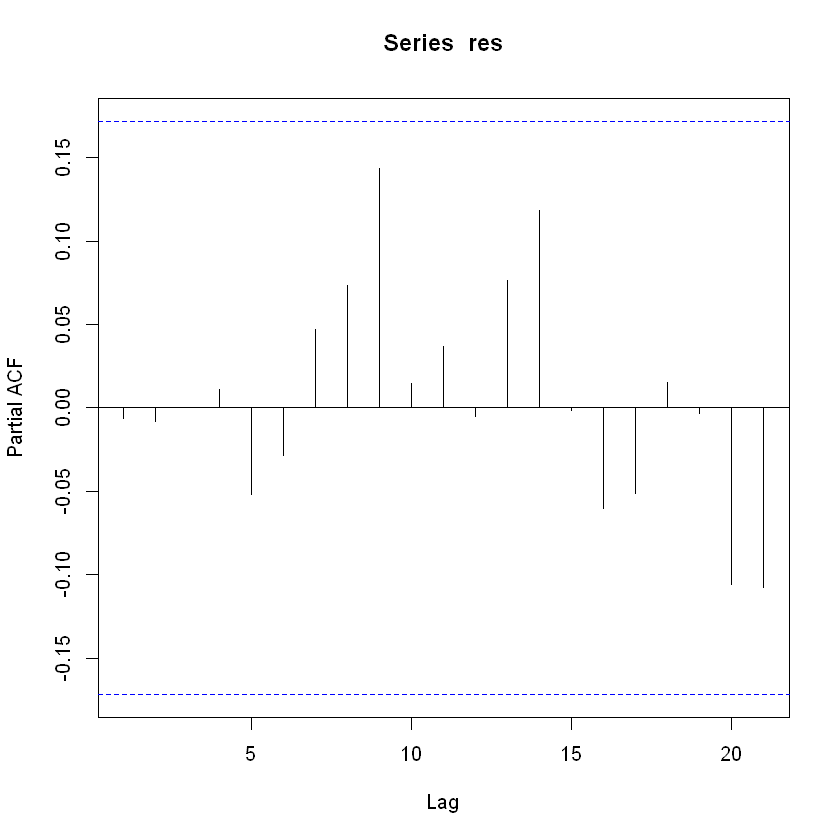

In [16]:
acf(res) 
pacf(res) 

**Incorrelación de forma analítica**

In [17]:
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.0049536, df = 1, p-value = 0.9439


**Normalidad**

In [18]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.91088, p-value = 3.054e-07


In [ ]:
Nota: no proviene de una distribución normal

## Predicciones

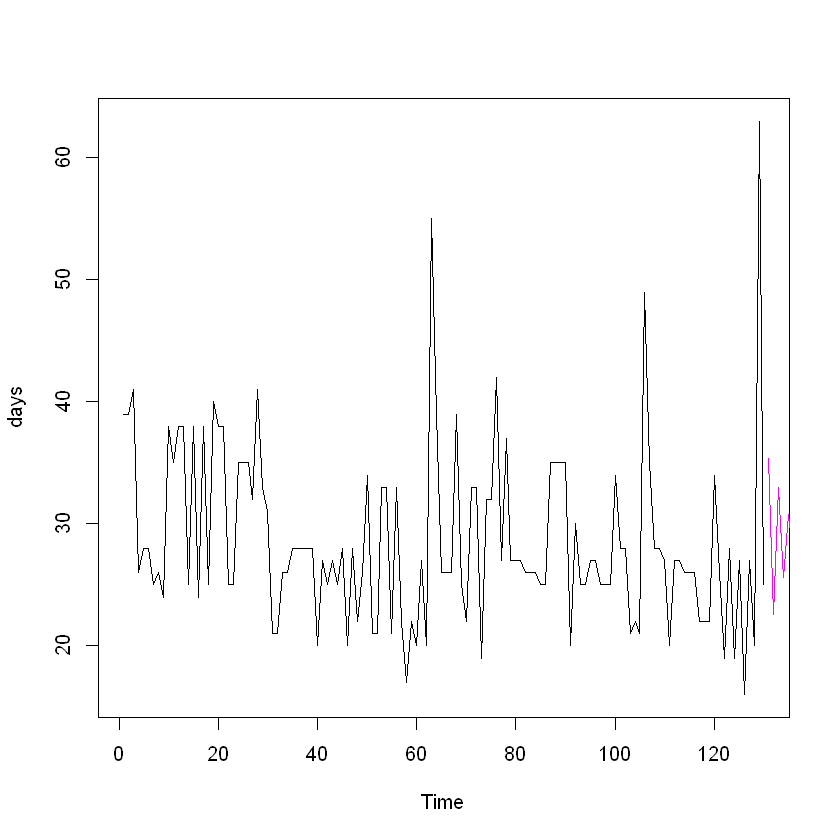

In [19]:
p<-predict(arima(days, order=c(1, 0,2), method="ML"), n.ahead=20)$pred
plot(days)
lines(p, col="magenta")

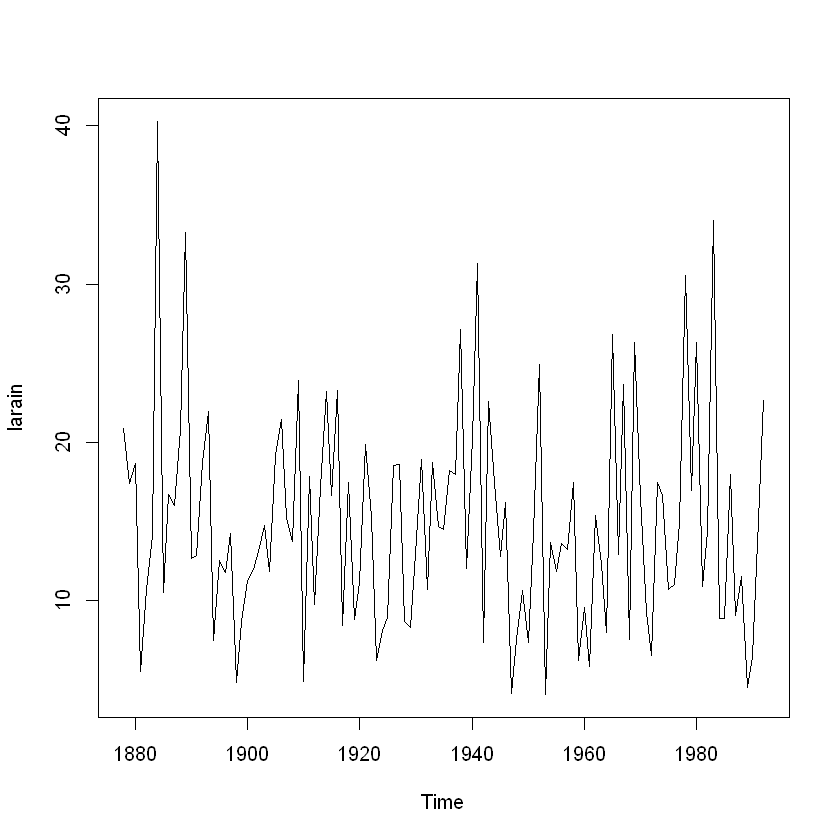

In [20]:
data(larain)
plot(larain)

## Clasificación

**Tendencia lineal**

In [21]:
t<-lm(larain~time(larain))
summary(t)


Call:
lm(formula = larain ~ time(larain))

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5871  -5.0542  -0.9686   3.2917  24.6733 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  42.51849   37.48118   1.134    0.259
time(larain) -0.01428    0.01937  -0.737    0.462

Residual standard error: 6.895 on 113 degrees of freedom
Multiple R-squared:  0.004787,	Adjusted R-squared:  -0.00402 
F-statistic: 0.5436 on 1 and 113 DF,  p-value: 0.4625


Nota: estacionaria en media

**Varianza**

In [22]:
adf.test(larain)


	Augmented Dickey-Fuller Test

data:  larain
Dickey-Fuller = -3.4351, Lag order = 4, p-value = 0.05218
alternative hypothesis: stationary


No es estacionaria en varianza en varianza, por lo que no es estacionaria

## Correciones

Warning message in adf.test(c1):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -7.2194, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary



Call:
lm(formula = c1 ~ time(c1))

Residuals:
    Min      1Q  Median      3Q     Max 
-29.453  -5.793   1.573   6.670  26.464 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -12.364584  54.716223  -0.226    0.822
time(c1)      0.006396   0.028266   0.226    0.821

Residual standard error: 9.931 on 112 degrees of freedom
Multiple R-squared:  0.000457,	Adjusted R-squared:  -0.008467 
F-statistic: 0.05121 on 1 and 112 DF,  p-value: 0.8214


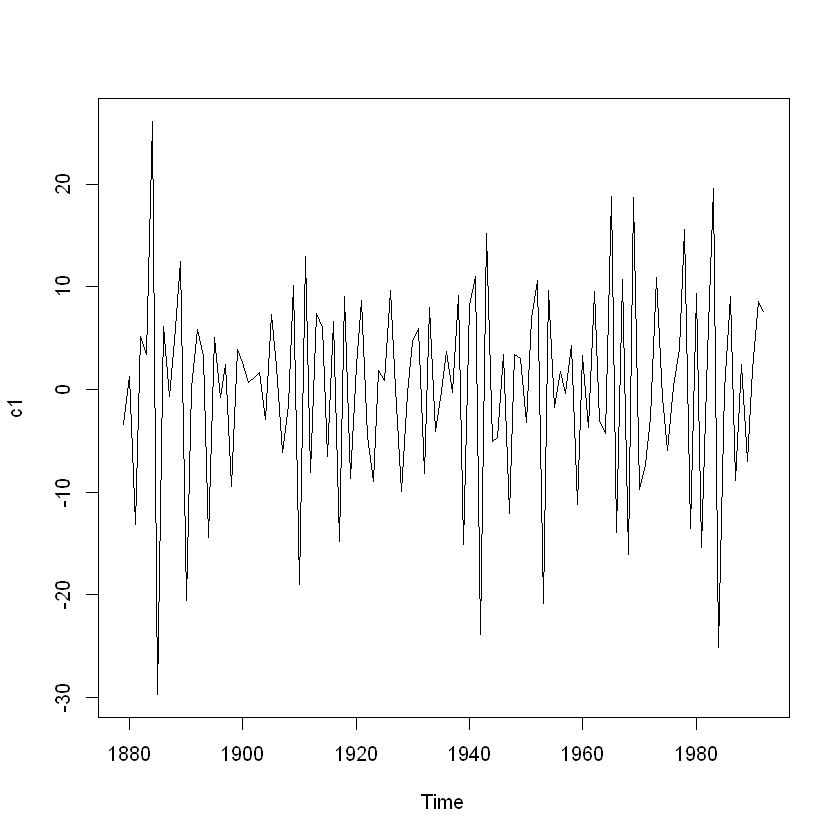

In [24]:
c1<-diff(larain)
plot(c1)
adf.test(c1)
t1<-lm(c1~time(c1))
summary(t1)

## Modelación

In [28]:
ar(c1)
AIC(arima(c1, order=c(4,0,0), method="ML"))


Call:
ar(x = c1)

Coefficients:
      1        2        3        4  
-0.8601  -0.6386  -0.4473  -0.2684  

Order selected 4  sigma^2 estimated as  56.06

[1] 783.5721

In [27]:
aic0<-Inf # le das un numero muy grande
for (i in 1:15)
{
  aic1<-AIC(arima(c1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
aic0 
MA.mejor

[1] 768.529

[1] 11

In [30]:
arma.aic<-Inf
for(j in 1:10)
{
  for (i in 1:10)
  {
    aux<-AIC(arima(c1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
arma.aic
ARMA.mejor 

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in log(s2):
"Se han producido NaNs"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg

[1] 767.1388

[1] 7 6

In [31]:
res.517<-residuals(arima(c1, order=c(7,0,6), method="ML"))

In [32]:
mean(res.517)

[1] -0.308671

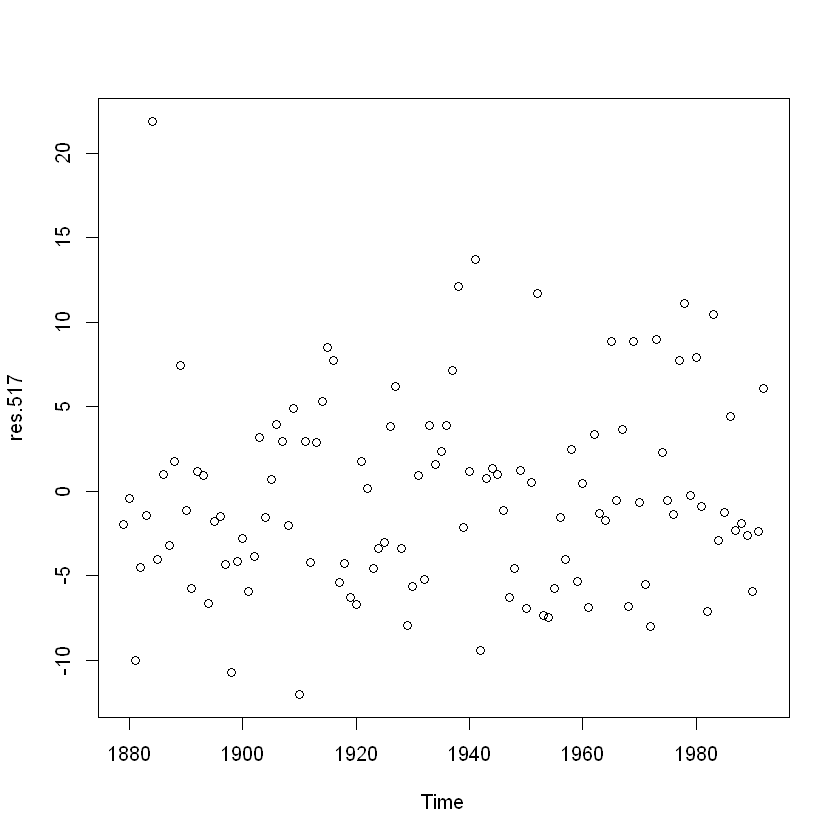

In [33]:
plot(res.517, type="p")

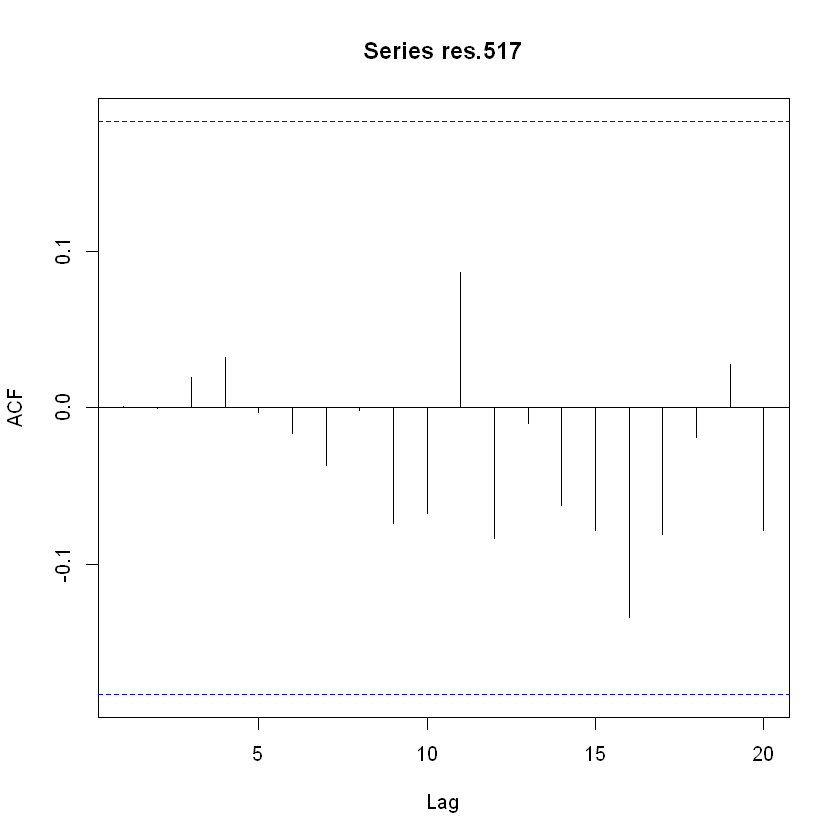

In [34]:
acf(res.517)
acf(res.517)

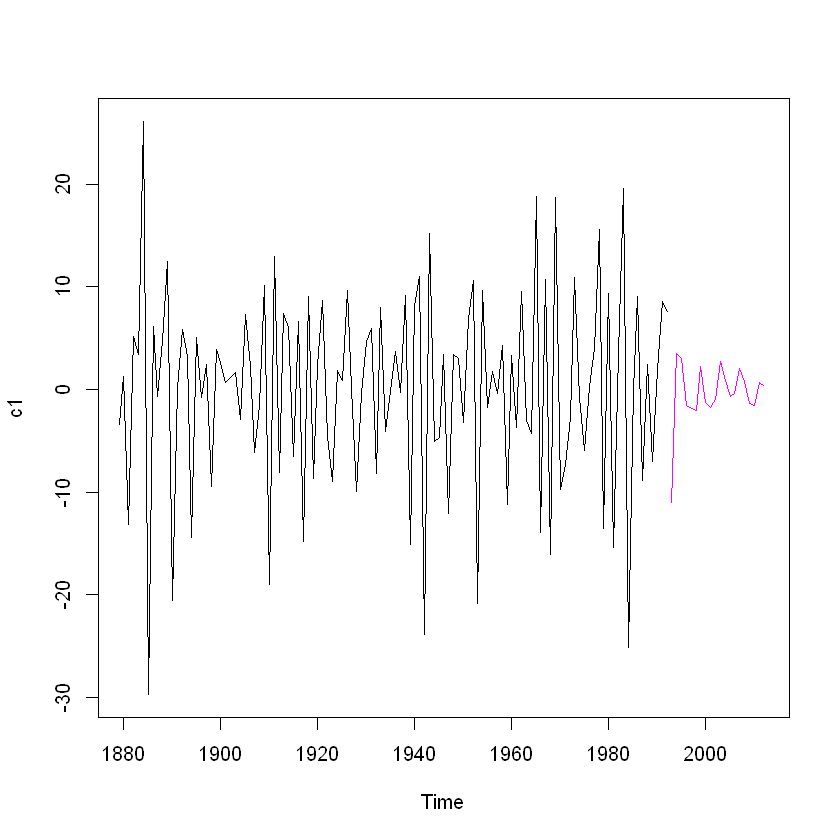

In [39]:
p<-predict(arima(c1, order=c(7, 0,6), method="ML"), n.ahead=20)$pred
plot(c1, xlim=c(1880, 2012))
lines(p, col="magenta")